In [17]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from datetime import date
#loading the dataset
house_df= pd.read_csv('train.csv')
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
#########################################Data Understanding################################################# 
#Overall Data missing percentage
round(100*house_df.isnull().sum()/len(house_df.index),2).sort_values(ascending=False)
house_df.columns[100*house_df.isnull().sum()/len(house_df.index)>45]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [19]:
##############################################Missing Value rectification#####################################
#Missing values improvment based on data dictionary for example 
#na=>PoolQC 'No Pool',na=>Fence 'No Fence'
#As data dictionary na for (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2) => No Basement'
#As data dictionary na for (GarageType,GarageFinish,GarageQual,GarageCond ) => 'No Garage'

house_df.loc[house_df['PoolQC'].isnull(),['PoolQC']] = 'No Pool'
house_df.loc[house_df['Fence'].isnull(),['Fence']] = 'No Fence'
house_df.loc[house_df['MiscFeature'].isnull(),['MiscFeature']] = 'none'
house_df.loc[house_df['Alley'].isnull(),['Alley']] = 'No alley access'
house_df.loc[house_df['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'
house_df.loc[house_df['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
house_df.loc[house_df['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
house_df.loc[house_df['BsmtExposure'].isnull(),['BsmtExposure']] = "No Basement"
house_df.loc[house_df['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
house_df.loc[house_df['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'
house_df.loc[house_df['MasVnrType'].isnull(),['MasVnrType']] = 'none'
house_df.loc[house_df['MasVnrArea'].isnull(),['MasVnrArea']] = 0
house_df.loc[house_df['GarageType'].isnull(),['GarageType']] = 'No Garage'
house_df.loc[house_df['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
house_df.loc[house_df['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
house_df.loc[house_df['GarageCond'].isnull(),['GarageCond']] = 'No Garage'

100*house_df['LotFrontage'].isnull().sum()/len(house_df.index)
#Replacing the missing values with mean
house_df["LotFrontage"].replace(np.nan, house_df["LotFrontage"].mean(),inplace=True)

#Replacing with mode value of the column
house_df.loc[house_df['Electrical'].isnull(),['Electrical']] = "SBrkr"

year_ = date.today().year
house_df.loc[house_df['GarageYrBlt'].isnull(),['GarageYrBlt']] = year_

###############################################drop duplicates###################################################
house_df.columns[100*house_df.isnull().sum()/len(house_df.index)>0]
house_df=house_df.drop_duplicates()
house_df.shape
house_df['SalePrice'].describe()
house_df.drop(['Id'],axis=1,inplace=True)

##############################################Derived variables from the dataset#################################
house_df['TotalSF'] = house_df['TotalBsmtSF'] + house_df['1stFlrSF'] + house_df['2ndFlrSF']
house_df["house_df_age"] = year_ - house_df["YearBuilt"]
house_df["garage_age"] = year_ - house_df["GarageYrBlt"]
house_df["gap_between_build_remodel"] = house_df["YearRemodAdd"] - house_df["YearBuilt"]

##############################################Datatype correction#################################################
house_df['MSSubClass'] = house_df['MSSubClass'].astype('object')
house_df['OverallCond'] = house_df['OverallCond'].astype('object')
house_df['YrSold'] = house_df['YrSold'].astype('object')
house_df['MoSold'] = house_df['MoSold'].astype('object')

#############################################Categorical and Numerical variables##################################
house_df_numeric=house_df.select_dtypes(include=['float64','int64'])
house_df_numeric.head()
house_df_numeric.columns
house_df_categorical=house_df.select_dtypes(include=['object'])
house_df_categorical.columns
print(len(house_df_categorical.columns))
print(len(house_df_numeric.columns))
#############################################correlation matrix###################################################
corr_matx = house_df_numeric.corr()
corr_matx

47
37


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,house_df_age,garage_age,gap_between_build_remodel
LotFrontage,1.000000,0.306795,0.234196,0.117598,0.082746,0.178699,0.215828,0.043340,0.122156,0.363358,...,0.009790,0.062335,0.037684,0.180868,0.001168,0.334901,0.427397,-0.117598,-0.024095,-0.075316
LotArea,0.306795,1.000000,0.105806,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,0.307234,-0.014228,0.050320,-0.005926
OverallQual,0.234196,0.105806,1.000000,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,...,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,0.668155,-0.572323,-0.385179,-0.241731
YearBuilt,0.117598,0.014228,0.572323,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,...,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.522897,0.347133,-1.000000,-0.640649,-0.733896
YearRemodAdd,0.082746,0.013788,0.550684,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,...,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.507101,0.342873,-0.592855,-0.532801,0.111922
MasVnrArea,0.178699,0.103321,0.407252,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,...,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,0.444454,-0.311600,-0.184760,-0.235602
BsmtFinSF1,0.215828,0.214103,0.239666,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,...,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,0.415843,-0.249503,-0.099998,-0.199531
BsmtFinSF2,0.043340,0.111170,-0.059119,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,...,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.048916,0.049107,0.095635,0.003443
BsmtUnfSF,0.122156,-0.002618,0.308159,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,...,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,0.373733,-0.149040,-0.160904,-0.031127
TotalBsmtSF,0.363358,0.260833,0.537808,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,...,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,0.826742,-0.391452,-0.230860,-0.237527


<Figure size 2880x2160 with 0 Axes>

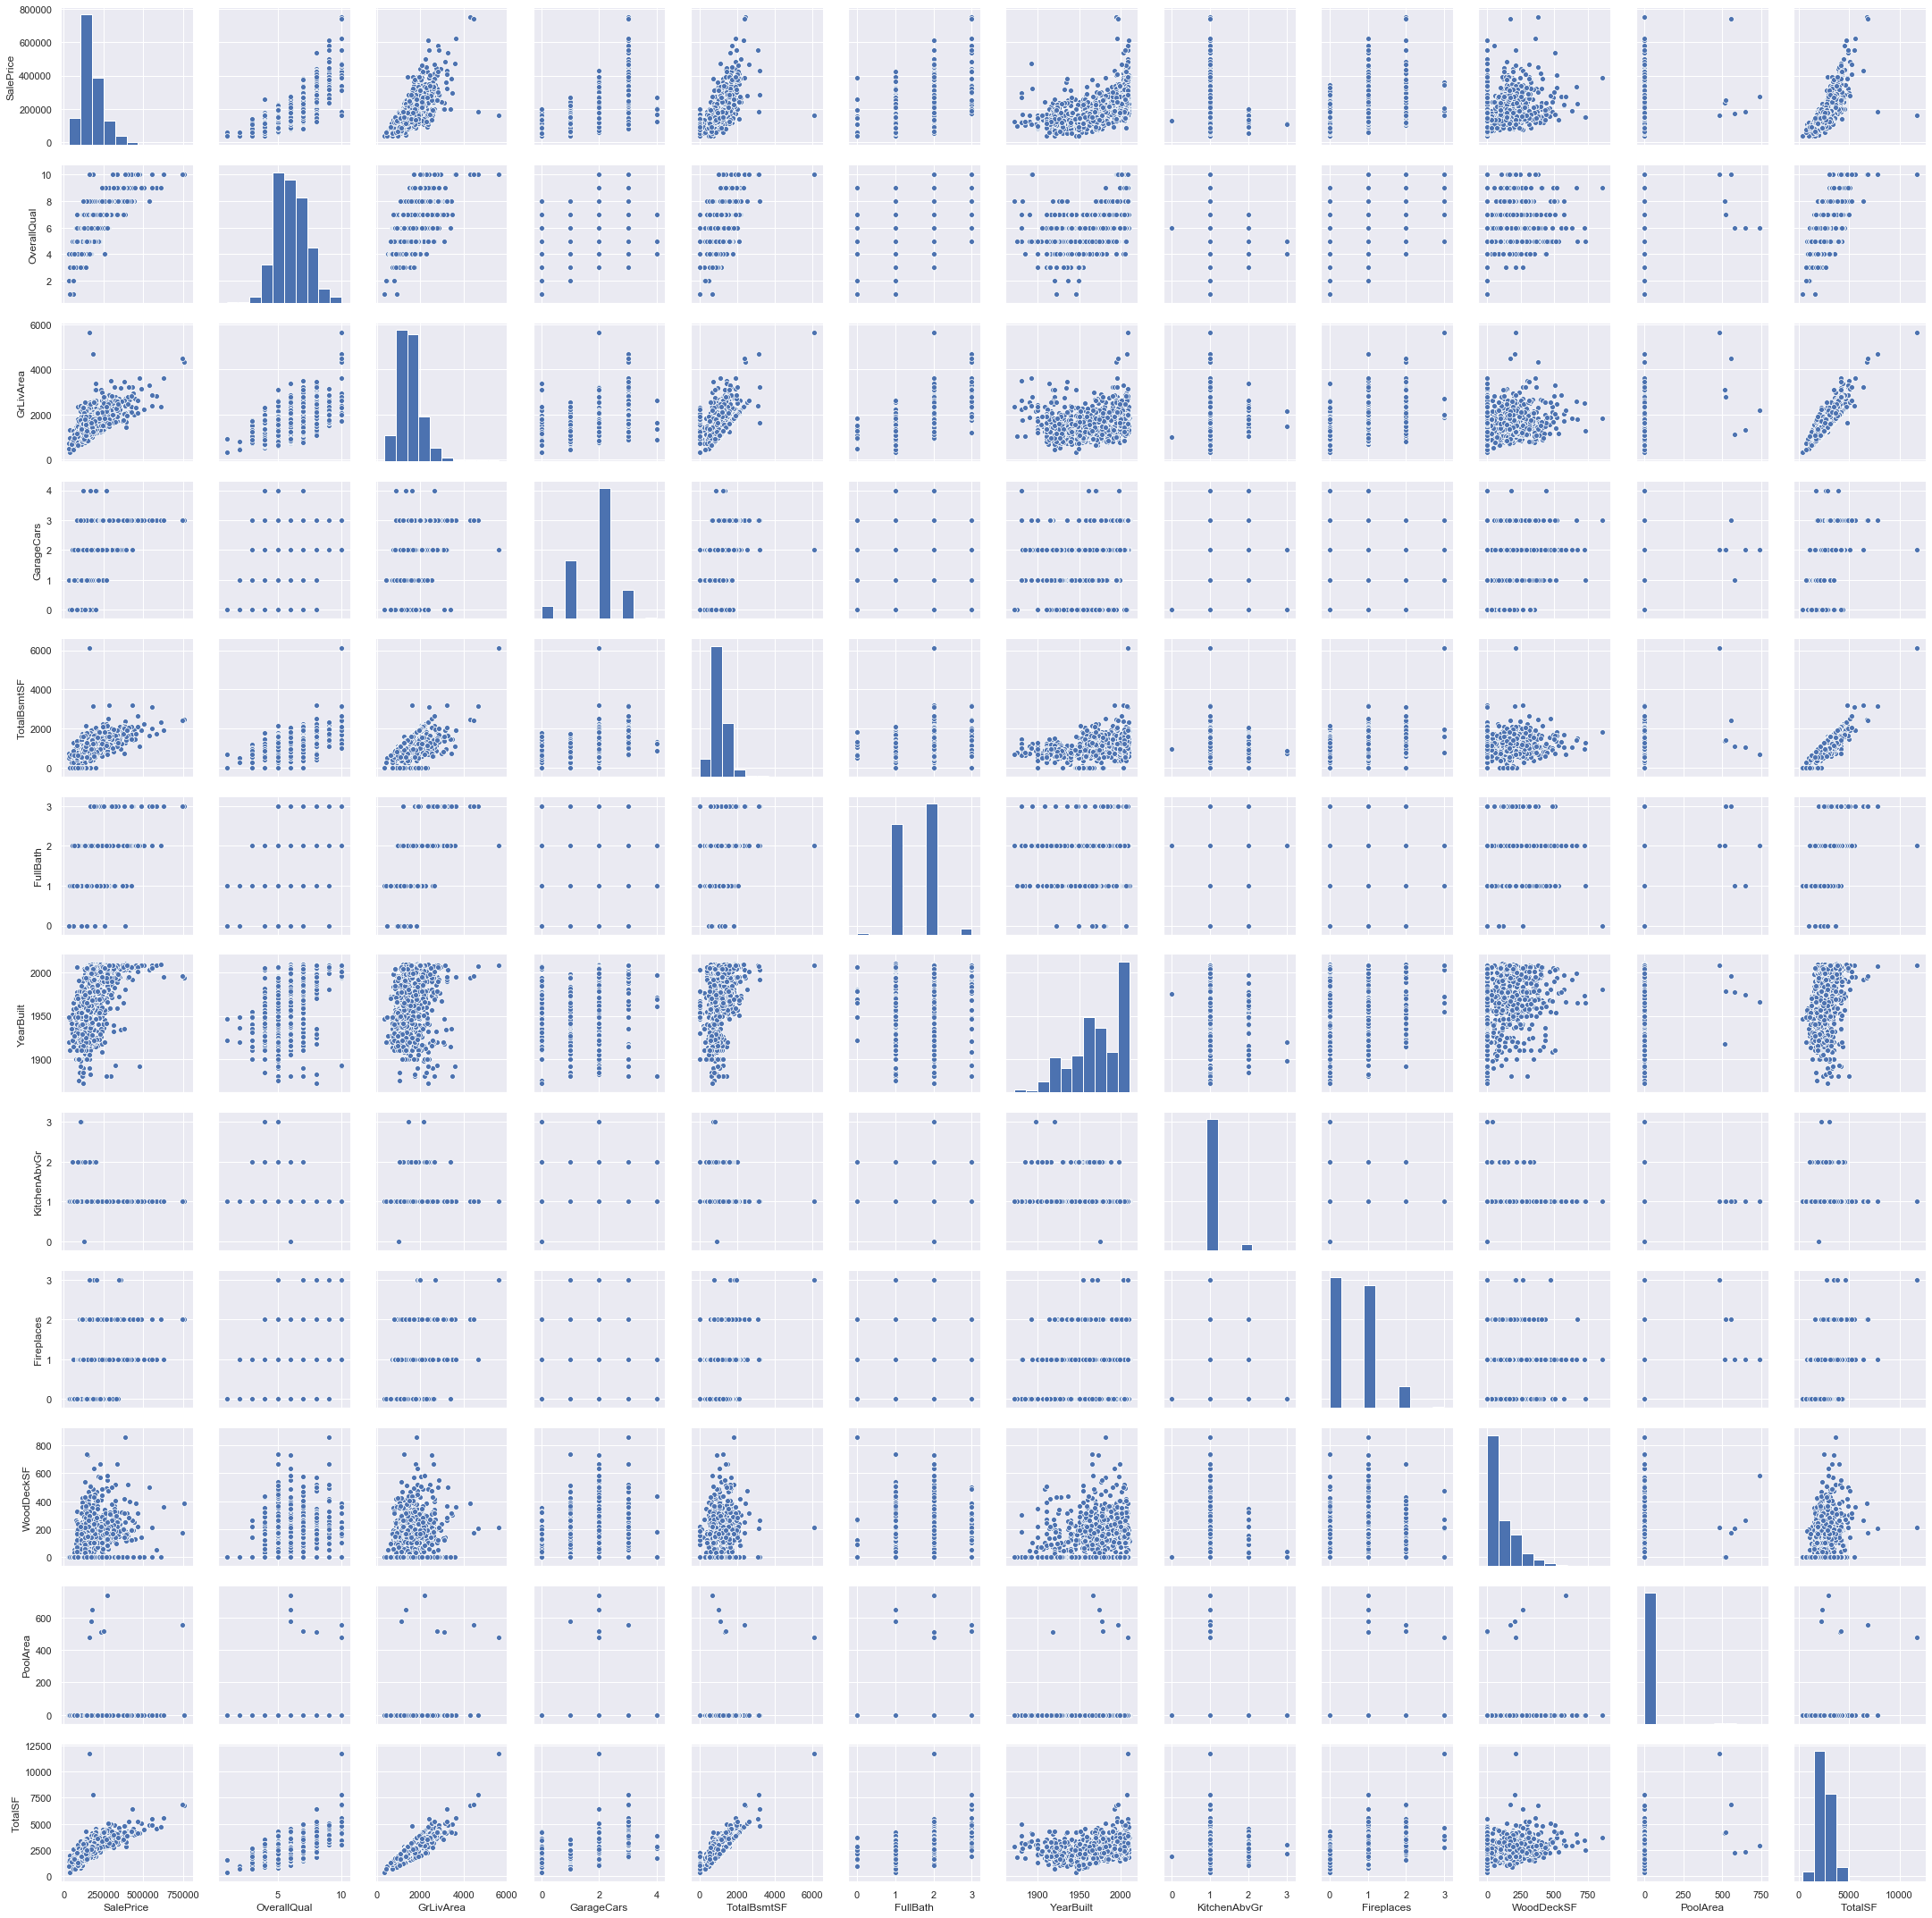

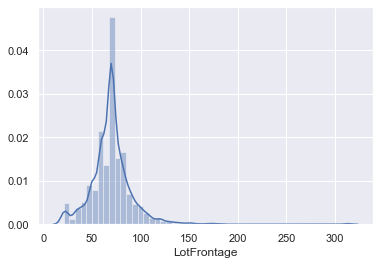

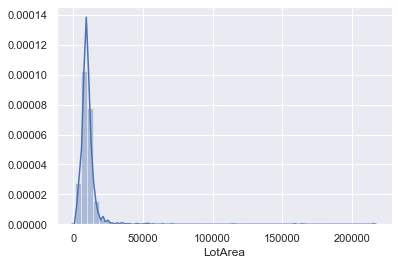

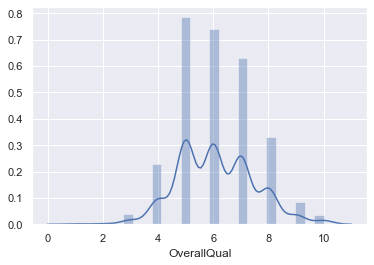

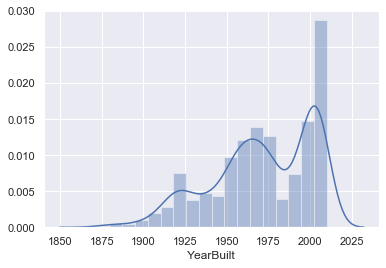

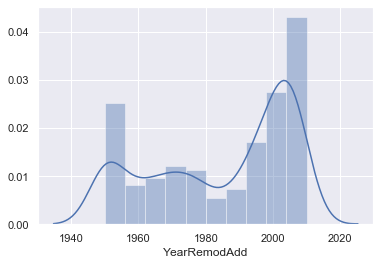

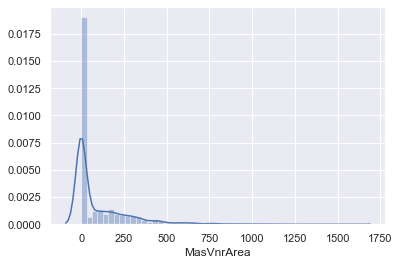

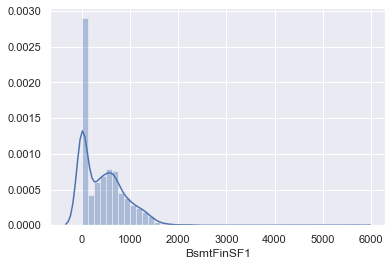

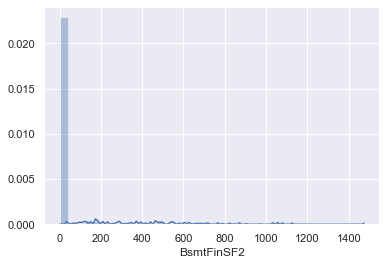

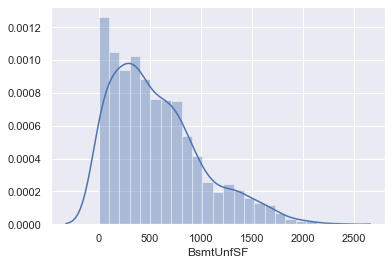

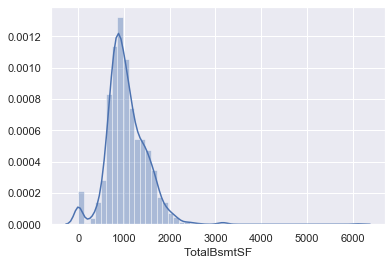

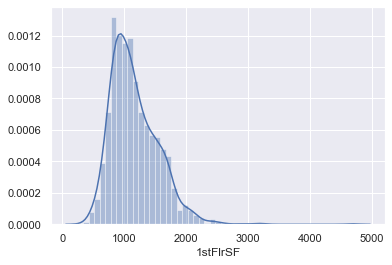

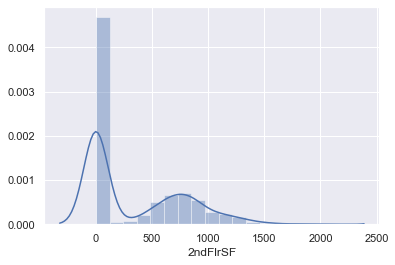

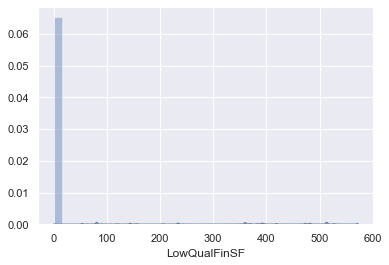

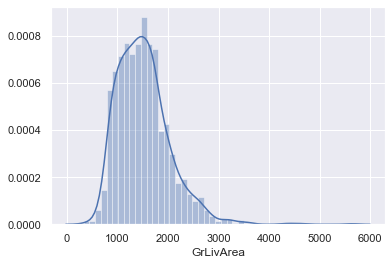

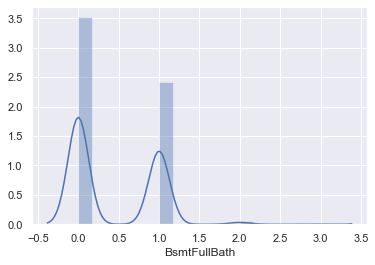

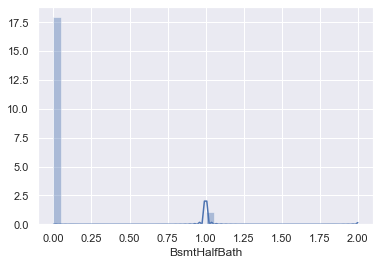

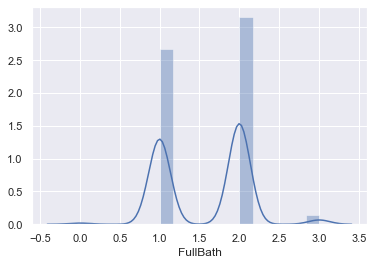

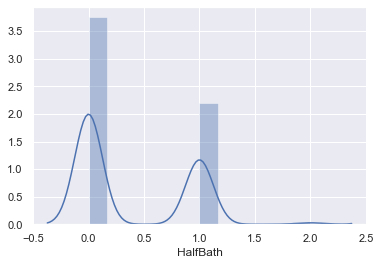

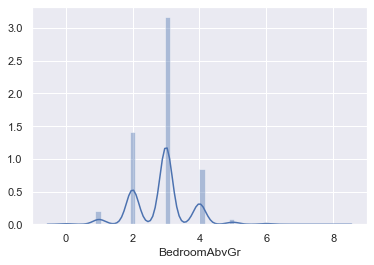

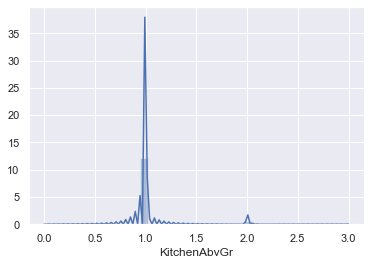

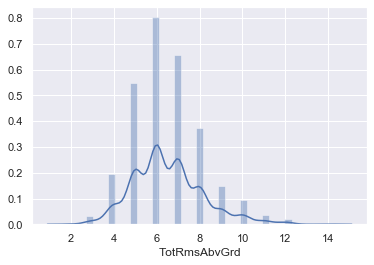

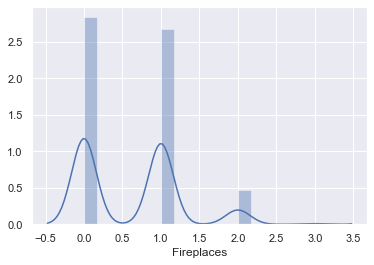

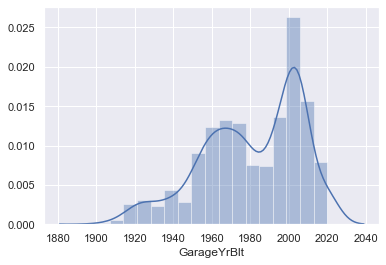

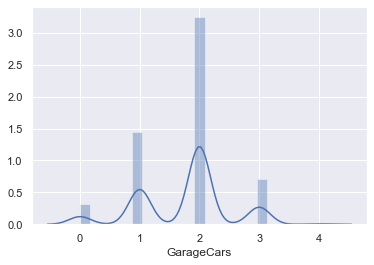

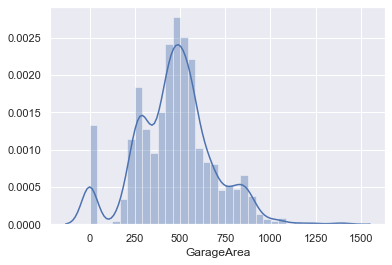

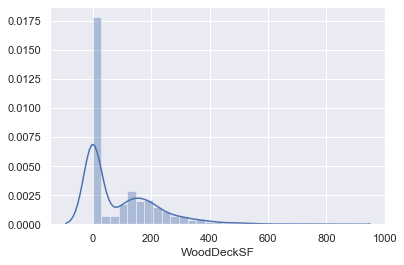

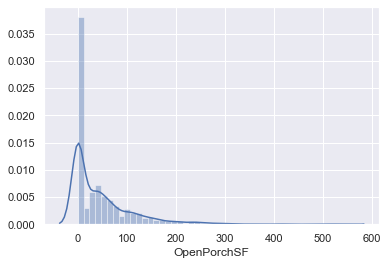

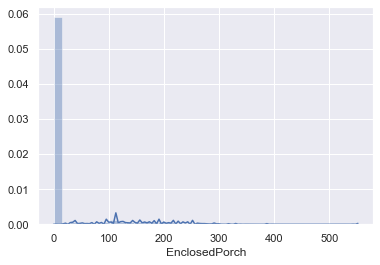

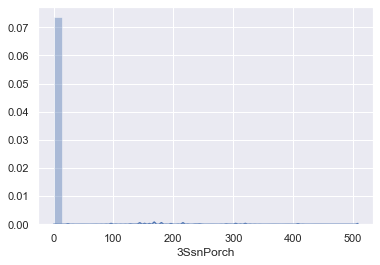

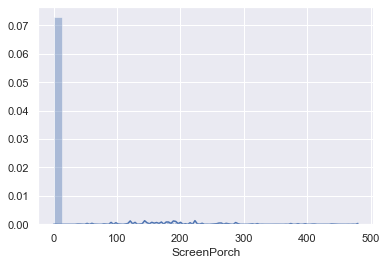

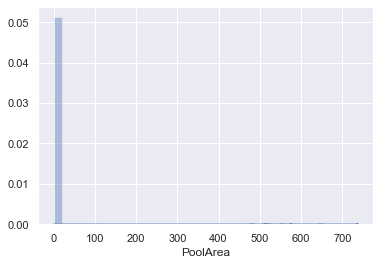

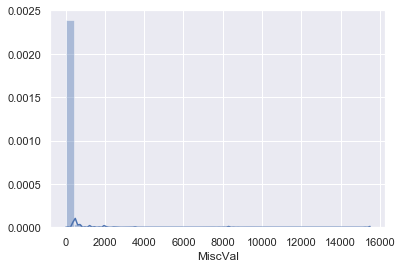

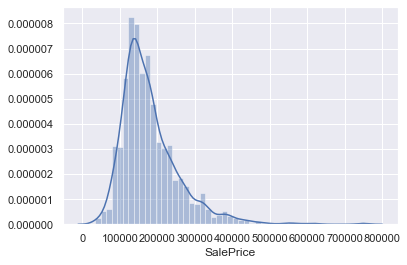

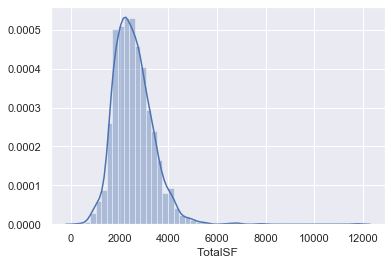

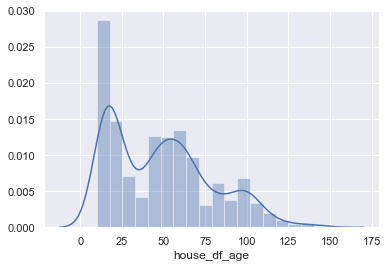

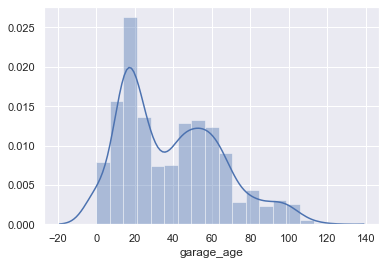

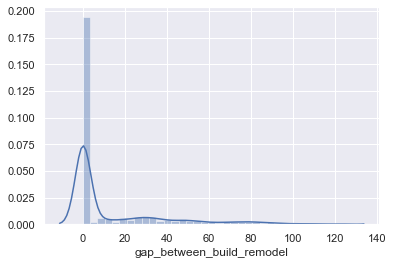

In [20]:
#################################################scatter plot of numeric variables############################################
sns.set()
plt.figure(figsize=(40, 30))
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt',
        'KitchenAbvGr','Fireplaces','WoodDeckSF','PoolArea','TotalSF']
sns.pairplot(house_df[cols], size = 2.5)
plt.show();
###################################################plot numeric columns helps remove redundant###############################
for col in house_df_numeric.columns:
    plt.figure(figsize=(6,4))
    sns.distplot(house_df[col])

In [21]:
#Droping columns which do not follow normal distribution
house_df_numeric.drop(['YearBuilt', 'YearRemodAdd','Fireplaces'], axis=1,inplace=True)
house_df_numeric.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,house_df_age,garage_age,gap_between_build_remodel
0,65.0,8450,7,196.0,706,0,150,856,856,854,...,0,0,0,0,0,208500,2566,17,17.0,0
1,80.0,9600,6,0.0,978,0,284,1262,1262,0,...,0,0,0,0,0,181500,2524,44,44.0,0
2,68.0,11250,7,162.0,486,0,434,920,920,866,...,0,0,0,0,0,223500,2706,19,19.0,1
3,60.0,9550,7,0.0,216,0,540,756,961,756,...,272,0,0,0,0,140000,2473,105,22.0,55
4,84.0,14260,8,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,0,250000,3343,20,20.0,0


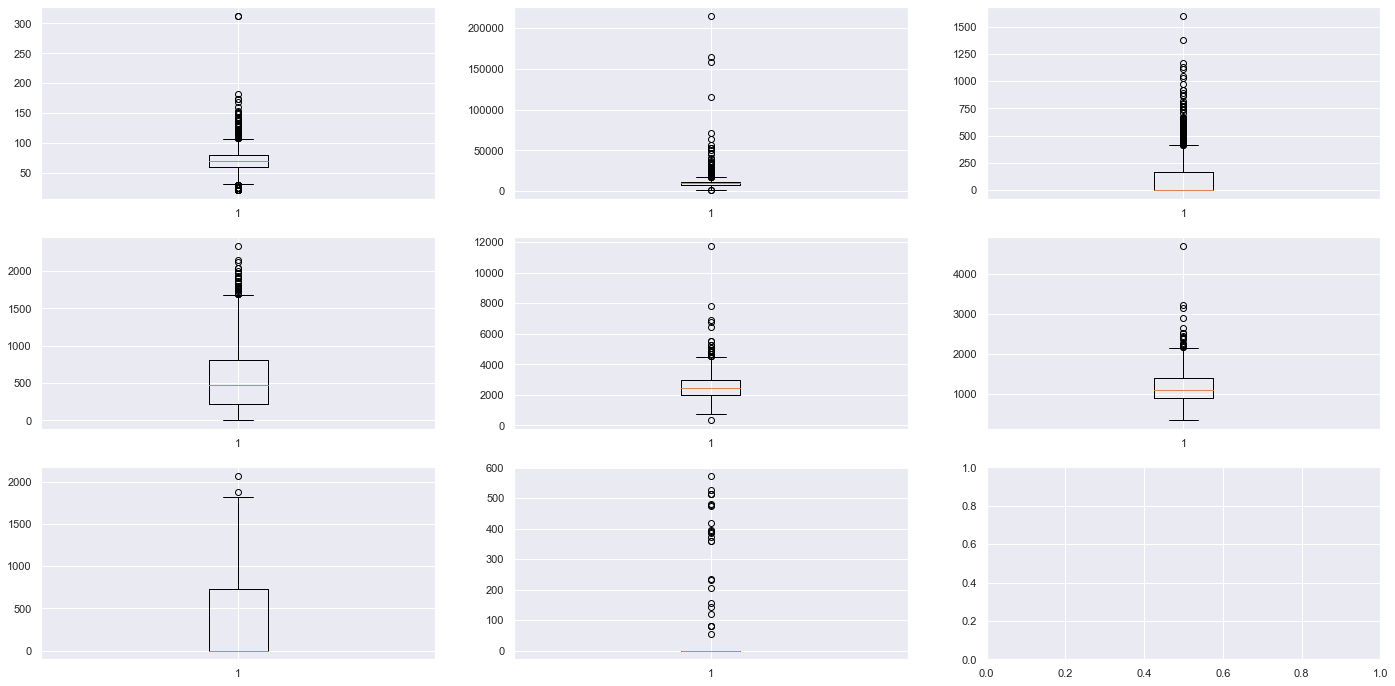

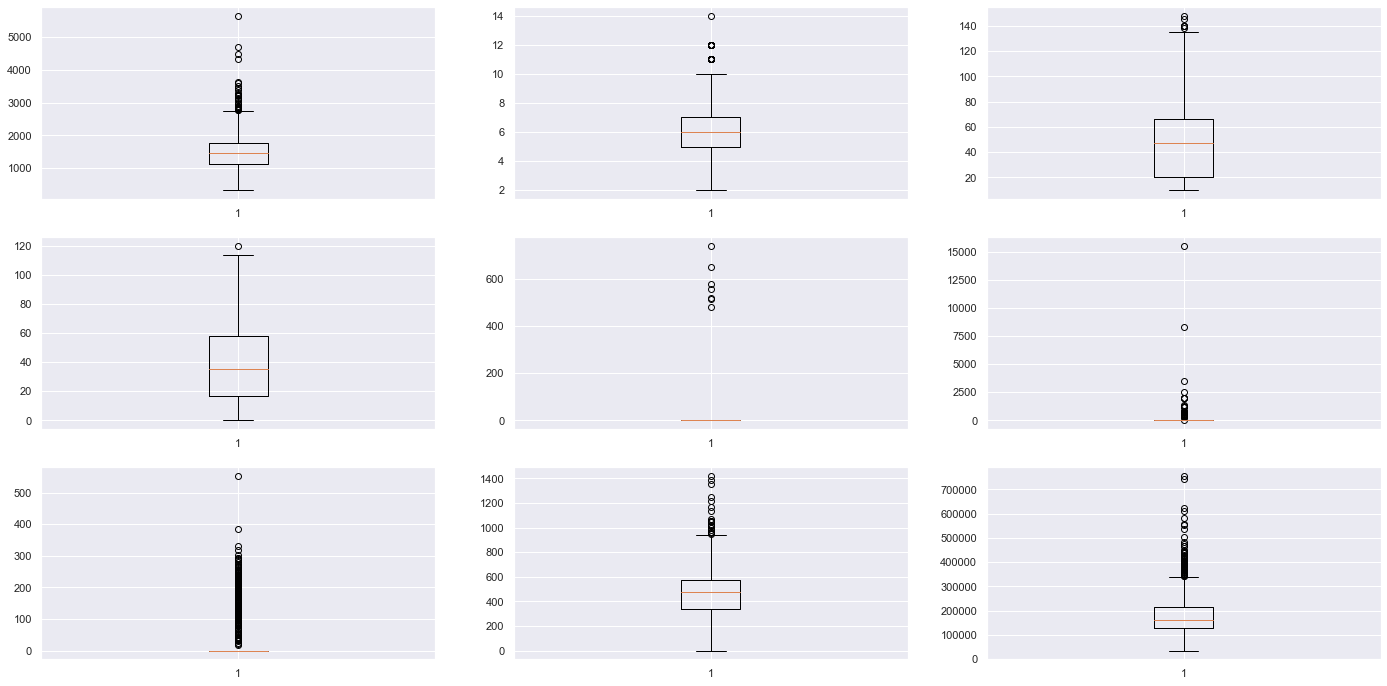

In [22]:
# boxplots of numeric variables for Outlier Analysis
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(house_df.LotFrontage)
plt.subplot(3,3,2)
plt.boxplot(house_df.LotArea)
plt.subplot(3,3,3)
plt.boxplot(house_df.MasVnrArea)
plt.subplot(3,3,4)
plt.boxplot(house_df.BsmtUnfSF)
plt.subplot(3,3,5)
plt.boxplot(house_df.TotalSF)
plt.subplot(3,3,6)
plt.boxplot(house_df['1stFlrSF'])
plt.subplot(3,3,7)
plt.boxplot(house_df['2ndFlrSF'])
plt.subplot(3,3,8)
plt.boxplot(house_df.LowQualFinSF)
plt.subplot(3,3,9)
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(house_df.GrLivArea)
plt.subplot(3,3,2)
plt.boxplot(house_df.TotRmsAbvGrd)
plt.subplot(3,3,3)
plt.boxplot(house_df.house_df_age)
plt.subplot(3,3,4)
plt.boxplot(house_df.garage_age)
plt.subplot(3,3,5)
plt.boxplot(house_df.PoolArea)
plt.subplot(3,3,6)
plt.boxplot(house_df.MiscVal)
plt.subplot(3,3,7)
plt.boxplot(house_df.EnclosedPorch)
plt.subplot(3,3,8)
plt.boxplot(house_df.GarageArea)
plt.subplot(3,3,9)
plt.boxplot(house_df.SalePrice)
plt.show()

In [23]:
###################################################### Outliers treatment #####################################################
Q1 = house_df.LotFrontage.quantile(0.25)
Q3 = house_df.LotFrontage.quantile(0.75)
IQR = Q3 - Q1
house_df = house_df[(house_df.LotFrontage >= Q1 - 1.5*IQR) & (house_df.LotFrontage <= Q3 + 1.5*IQR)]

Q1 = house_df.LotArea.quantile(0.25)
Q3 = house_df.LotArea.quantile(0.75)
IQR = Q3 - Q1

house_df = house_df[(house_df.LotArea >= Q1 - 1.5*IQR) & (house_df.LotArea <= Q3 + 1.5*IQR)]
Q1 = house_df.PoolArea.quantile(0.25)
Q3 = house_df.PoolArea.quantile(0.75)
IQR = Q3 - Q1
house_df = house_df[(house_df.PoolArea >= Q1 - 1.5*IQR) & (house_df.PoolArea <= Q3 + 1.5*IQR)]

Q1 = house_df.MiscVal.quantile(0.25)
Q3 = house_df.MiscVal.quantile(0.75)
IQR = Q3 - Q1
house_df = house_df[(house_df.MiscVal >= Q1 - 1.5*IQR) & (house_df.MiscVal <= Q3 + 1.5*IQR)]

# split into X and y
X = house_df.drop(['SalePrice'], axis=1)
y = house_df['SalePrice']

#replacing with binary values 
house_df["CentralAir"]=house_df["CentralAir"].map({'Y': 1, "N": 0})

#include the categorical columns
house_df_categorical_df=X.select_dtypes(include=['object'])

house_df_categorical_df.columns

#create dummy variables of categorical columns
house_df_df_dummies = pd.get_dummies(house_df_categorical_df, drop_first=True)
house_df_df_dummies.head()

# Drop original categorical variables post creating dummies
X = X.drop(list(house_df_categorical_df.columns), axis=1)

# concat dummy variables with X
X = pd.concat([X, house_df_df_dummies], axis=1)

#process of scaling
scaler = StandardScaler()
scale_var = X.columns
X[scale_var] = scaler.fit_transform(X[scale_var])
X.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,...,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03
mean,3.360263e-16,-2.174261e-16,-1.877873e-16,-1.439927e-15,4.138226e-15,-3.624815e-16,-4.708135e-17,2.351377e-16,-2.887656e-17,-4.752974e-17,...,9.227608e-16,-1.204386e-16,2.035708e-17,3.562489e-16,-8.474643e-17,-5.301136e-17,-6.625018e-17,-4.360630e-17,-8.313221e-17,2.824881e-17
std,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,...,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00
min,-2.526777e+00,-2.511377e+00,-3.716806e+00,-3.214596e+00,-1.674608e+00,-5.727946e-01,-1.017643e+00,-2.817893e-01,-1.300883e+00,-2.591724e+00,...,-5.693409e-02,-6.368006e-02,-3.075818e-01,-4.928641e-02,-2.515043e+00,-5.693409e-02,-8.557469e-02,-1.214664e-01,-2.121844e+00,-3.107179e-01
25%,-6.026365e-01,-6.168839e-01,-7.980583e-01,-6.207944e-01,-9.101314e-01,-5.727946e-01,-1.017643e+00,-2.817893e-01,-7.631490e-01,-6.025351e-01,...,-5.693409e-02,-6.368006e-02,-3.075818e-01,-4.928641e-02,3.976074e-01,-5.693409e-02,-8.557469e-02,-1.214664e-01,4.712882e-01,-3.107179e-01
50%,8.798940e-02,-2.558413e-02,-6.837132e-02,9.250109e-02,4.277023e-01,-5.727946e-01,-1.189992e-01,-2.817893e-01,-2.051871e-01,-1.483206e-01,...,-5.693409e-02,-6.368006e-02,-3.075818e-01,-4.928641e-02,3.976074e-01,-5.693409e-02,-8.557469e-02,-1.214664e-01,4.712882e-01,-3.107179e-01
75%,6.343106e-01,6.347407e-01,6.613157e-01,9.679092e-01,9.055000e-01,3.565129e-01,6.593536e-01,-2.817893e-01,5.252767e-01,5.483880e-01,...,-5.693409e-02,-6.368006e-02,-3.075818e-01,-4.928641e-02,3.976074e-01,-5.693409e-02,-8.557469e-02,-1.214664e-01,4.712882e-01,-3.107179e-01
max,2.627170e+00,2.655082e+00,2.850377e+00,1.259712e+00,1.192179e+00,8.720281e+00,4.143072e+00,9.490770e+00,3.949466e+00,5.301023e+00,...,1.756417e+01,1.570350e+01,3.251168e+00,2.028957e+01,3.976074e-01,1.756417e+01,1.168570e+01,8.232726e+00,4.712882e-01,3.218353e+00


In [24]:
################################################ Build Model on Analysis ###################################################
# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size = 0.3, random_state = 100)
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predictiction 
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
lm.intercept_

# Coefficients values
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
print("Overfitting training accuracy is higher than test")


Overfitting training accuracy is higher than test


In [25]:
##################################################### Lasso regression ##########################################################
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
#list(zip(cols, model_parameters))

0.9474061456062081
0.9007925016608306


lets tune the hyperparameter

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   15.1s finished


Best Param  {'alpha': 200}


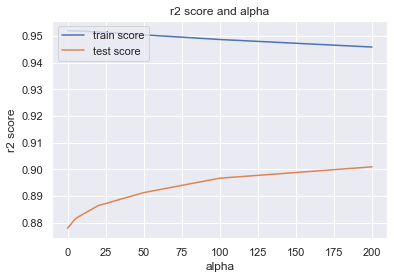

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   16.1s finished


Best Param {'alpha': 200}


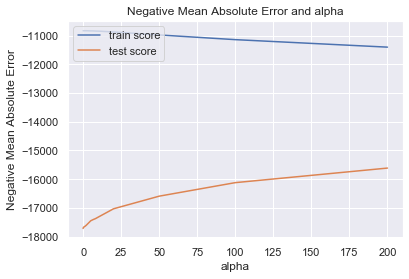

In [26]:
################################################## k fold with r2 score ###############################################

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

print("Best Param ",model_cv.best_params_)

############################################# Plot r2 score and choose optimal value of alpha ###########################
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

############################################# k fold with neg_mean_absolute_error score tune hyper parameter#############
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

print("Best Param",model_cv.best_params_)

##############################################Plot mean test and train scores with alpha################################# 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [27]:
####################################################Lasso with alpha 200 #########################################
lm = Lasso(alpha=200)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# lasso model parameters with alpha = 200
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
#list(zip(cols, model_parameters))
final_var=dict(zip(cols, model_parameters))
#{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

0.9418282591324523
0.919483384396491


With optimal value of alpha=200 we got r2 values for training and test data as 0.94 and 0.91 which is good indication that model is not overfit

0.9474065249348111
0.9006818447867608
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


{'alpha': 10.0}


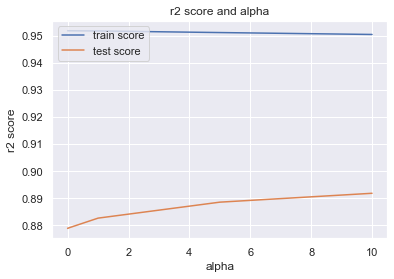

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


{'alpha': 10.0}


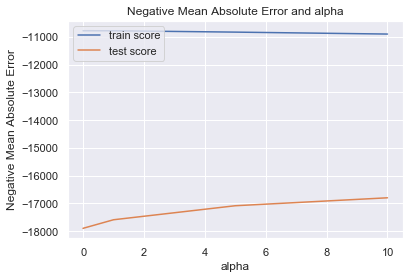

In [28]:
##################################################### ridge regression ##########################################################
lm = Ridge(alpha=0.001)
lm.fit(X_train, y_train)

#Predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

####################################################k fold with r2 score and tune hyper parameter###############################
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

print(model_cv.best_params_)


############################################# Plot r2 score and choose optimal value of alpha ################################
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


############################################# k fold with neg_mean absolute error score tune hyper parameter######################
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

print(model_cv.best_params_)
##############################################Plot mean test and train scores with alpha########################################### 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [29]:
#################################################### ridge with alpha 10 #########################################
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

#variables with no zero coefficient values are selected
X_new=cols.drop(['LotFrontage','BsmtUnfSF','1stFlrSF','BsmtFullBath','GarageYrBlt','GarageArea','PoolArea','MiscVal','gap_between_build_remodel',
          'MSSubClass_50','MSSubClass_60','MSSubClass_190','Alley_Pave','Neighborhood_MeadowV','Neighborhood_SWISU','Neighborhood_SawyerW','Condition2_Norm',
          'Condition2_RRAn','Condition2_PosA','BldgType_TwnhsE','HouseStyle_1Story','HouseStyle_SLvl','OverallCond_6','RoofStyle_Hip','RoofMatl_Roll','Exterior1st_AsphShn','Exterior1st_Stucco',
'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd','Exterior2nd_Plywood','MasVnrType_none','ExterCond_TA','BsmtQual_No Basement','BsmtCond_Gd','BsmtCond_Po','BsmtCond_No Basement','BsmtExposure_No Basement','BsmtFinType1_No Basement','BsmtFinType1_No Basement',
'BsmtFinType2_GLQ','BsmtFinType2_No Basement','Functional_Min1','FireplaceQu_Gd','GarageType_Attchd','GarageType_CarPort','GarageFinish_No Garage','GarageQual_Gd','GarageQual_No Garage','GarageCond_No Garage','MiscFeature_Shed','MiscFeature_none','SaleType_ConLD','SaleType_ConLw','SaleType_New'])

# Put variables to a list
reduced_cols=list(X_new)
reduced_cols.remove('constant')
X_NEW=X[reduced_cols]

X_NEW.head()

0.9464820203493425
0.9075798823615632


,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,2ndFlrSF,LowQualFinSF,...,SaleType_CWD,SaleType_Con,SaleType_ConLI,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.308988,0.661316,1.032754,0.857720,0.565607,0.647560,-0.281789,-0.484365,1.225510,-0.112001,...,-0.056934,-0.040226,-0.056934,-0.049286,0.397607,-0.056934,-0.085575,-0.121466,0.471288,-0.310718
1,0.100709,-0.068371,0.157346,-0.432334,-0.572795,1.289112,-0.281789,0.515153,-0.778503,-0.112001,...,-0.056934,-0.040226,-0.056934,-0.049286,0.397607,-0.056934,-0.085575,-0.121466,0.471288,-0.310718
2,0.688536,0.661316,0.967909,0.809940,0.368129,0.128659,-0.281789,-0.326806,1.253669,-0.112001,...,-0.056934,-0.040226,-0.056934,-0.049286,0.397607,-0.056934,-0.085575,-0.121466,0.471288,-0.310718
3,0.082897,0.661316,-1.820428,-0.719012,-0.572795,-0.508176,-0.281789,-0.730552,0.995541,-0.112001,...,-0.056934,-0.040226,-0.056934,-0.049286,0.397607,-0.056934,-0.085575,-0.121466,-2.121844,-0.310718
4,1.760873,1.391003,0.935487,0.714381,1.460066,0.527270,-0.281789,0.227114,1.692487,-0.112001,...,-0.056934,-0.040226,-0.056934,-0.049286,0.397607,-0.056934,-0.085575,-0.121466,0.471288,-0.310718


Builing the Ridge regression after variable shrinkage done by lasso

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


{'alpha': 10.0}


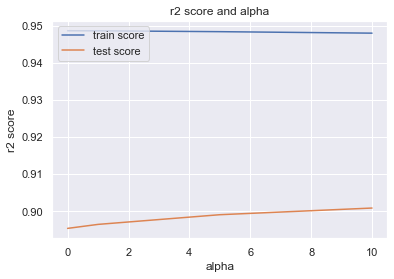

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


Best Param {'alpha': 10.0}


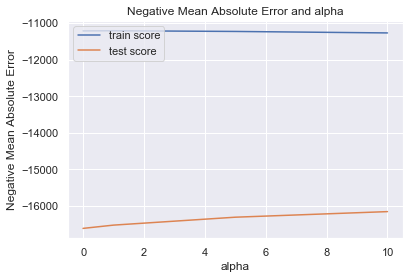

In [30]:
##################################################### Split test and train again using new X########################################

X_train, X_test, y_train, y_test = train_test_split(X_NEW, y, train_size=0.7,
                                                    test_size = 0.3, 
                                                    random_state = 100)
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

#################################################### cross validation ##############################################################
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()
print(model_cv.best_params_)

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#################################################### k fold with neg_mean_absolute_error score #####################################
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

####################################################  cross validation #############################################################
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

print("Best Param",model_cv.best_params_)

################################################# mean test and train scoes with alpha to tune hyper parameter ######################
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [31]:
######################################################  model with optimal alpha = 10 ##########################################
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)

#Predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
final_var=dict(zip(cols, model_parameters))
#{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

0.944511019637295
0.9132677327943598


In [32]:
print("#################################################Conclusion #######################################################################")
print("#################################################Top Features #####################################################################")
print("GrLivArea,LotFrontage,OverallQual,LotArea,GarageArea,Neighborhood_Crawfor,MSSubClass_45,MasVnrArea,1stFlrSF,ExterQual,Exterior1st_CBlock,Exterior1st_CemntBd")
print("Foundation_Stone,Foundation_Wood,Exterior1st_WdShing,WoodDeckSF,Exterior2nd_AsphShn,GarageType_Basment,Exterior2nd_BrkFace")
print("###################################################################################################################################")
print("optimal value of alpha 10 for ridge regression=> train and test data set. R2 for train : 0.9445110196372949 R2 for test : 0.9132677327943598")
print("we conclude that model is not overfitting.score is pretty close to previous ridge regression model")
print("###################################################################################################################################")
print("Optimal value of alpha of lasso regression is 200 and r2 score for optimal value of alpha is given below R2 score for train : 0.9418282591324523 R2 score for test : 0.919483384396491")
print("Optimal value of alpha of ridge regression is 10 and r2 score for optimal value of alpha as below R2 score train : 0.9464820203493424 R2 score test: 0.9075798823615632")
print("Optimal value of alpha is 10 for ridge regression on variables selected by lasso regession and r2 score for optimal value of alpha as below")
print("R2 score for train : 0.9445110196372949 R2 score for test : 0.9132677327943598 Lasso has successfully reduced variables by shrinking variable coefficient to 0")

#################################################Conclusion #######################################################################
#################################################Top Features #####################################################################
GrLivArea,LotFrontage,OverallQual,LotArea,GarageArea,Neighborhood_Crawfor,MSSubClass_45,MasVnrArea,1stFlrSF,ExterQual,Exterior1st_CBlock,Exterior1st_CemntBd
Foundation_Stone,Foundation_Wood,Exterior1st_WdShing,WoodDeckSF,Exterior2nd_AsphShn,GarageType_Basment,Exterior2nd_BrkFace
###################################################################################################################################
optimal value of alpha 10 for ridge regression=> train and test data set. R2 for train : 0.9445110196372949 R2 for test : 0.9132677327943598
we conclude that model is not overfitting.score is pretty close to previous ridge regression model
####################################################################################